<a href="https://colab.research.google.com/github/timoteo0903/ComputerVision/blob/main/Ejercicio8y9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install -q mediapy
!pip install pytube
!apt update && apt install -y handbrake
!pip install moviepy
%pip install ultralytics



Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
45 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
h

In [4]:
%%capture

from pytube import YouTube

# URL del video de YouTube
url = 'https://www.youtube.com/watch?v=PJ5xXXcfuTc&list=PLcQZGj9lFR7y5WikozDSrdk6UCtAnM9mB&index=4'

# Crear un objeto YouTube
yt = YouTube(url)

# Seleccionar el stream con resolución de 720p
video = yt.streams.filter(progressive=True, file_extension='mp4', res="720p").first()

# Nombre del archivo de salida
output_filename = 'autopista.mp4'

# Descargar el video con el nombre especificado
video.download(filename=output_filename)

print("Descarga completada.")

In [ ]:
#Esto convierte el video a un formato más liviano de trabajo
!ffmpeg -y -i highway.mp4 -vf "scale=600:-1" -an -t 30 autopista_600.mp4

In [6]:
import mediapy as media
url = 'autopista_600.mp4'
video = media.read_video(url)
media.show_video(video)

In [11]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

video_input = "autopista_600.mp4"
video_output = "autopista_600_cortado.mp4"

# Definir los segundos de inicio y final
start_second = 12
end_second = 30

# Extraer el clip deseado
ffmpeg_extract_subclip(video_input, start_second, end_second, targetname=video_output)

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [12]:
url = 'autopista_600_cortado.mp4'
video = media.read_video(url)
media.show_video(video)

In [14]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/107.7 GB disk)


In [16]:
! [ ! -f autopista_600_cortado.mp4 ] &&  wget https://raw.githubusercontent.com/jpmanson/tuia-unr/main/videos/autopista_600_cortado.mp4
!yolo predict model=yolov8n.pt source='autopista_600_cortado.mp4' save=True project=autopista_yolov8


Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

video 1/1 (frame 1/650) /content/autopista_600_cortado.mp4: 384x640 8 cars, 1 truck, 265.4ms
video 1/1 (frame 2/650) /content/autopista_600_cortado.mp4: 384x640 9 cars, 248.6ms
video 1/1 (frame 3/650) /content/autopista_600_cortado.mp4: 384x640 9 cars, 177.6ms
video 1/1 (frame 4/650) /content/autopista_600_cortado.mp4: 384x640 9 cars, 150.2ms
video 1/1 (frame 5/650) /content/autopista_600_cortado.mp4: 384x640 9 cars, 159.8ms
video 1/1 (frame 6/650) /content/autopista_600_cortado.mp4: 384x640 9 cars, 158.1ms
video 1/1 (frame 7/650) /content/autopista_600_cortado.mp4: 384x640 10 cars, 151.3ms
video 1/1 (frame 8/650) /content/autopista_600_cortado.mp4: 384x640 11 cars, 148.6ms
video 1/1 (frame 9/650) /content/autopista_600_cortado.mp4: 384x640 12 cars, 147.9ms
video 1/1 (frame 10/650) /content/autopista_600_cortado.mp4: 384x64

In [17]:
%%capture
!ffmpeg -i 'autopista_yolov8/predict/autopista_600_cortado.avi' -vcodec libx264 'autopista_yolov8/predict/autopista_600_cortado.mp4' -y

In [18]:
url = 'autopista_yolov8/predict/autopista_600_cortado.mp4'
video = media.read_video(url)
media.show_video(video)

In [19]:
import mediapy as media  # Importar la biblioteca mediapy para manejo de medios
import cv2  # Importar OpenCV para el procesamiento de imágenes y videos
import numpy as np
from ultralytics import YOLO

# Load the pre-trained YOLOv8 model

model = YOLO('yolov8n')  # This will automatically download the model weights

# Función para detectar objetos en una imagen:
def detect_objects(new_image, prev_image, **kwargs):
    # Convertir la imagen a float32
    results = model(new_image)

    # Clases de interés para graficar
    classes = kwargs.get('classes', ['bus', 'car', 'truck', 'person' , 'motorcycle'])

    # Iteramos sobre los boung boxes obtenidos
    for box in results[0].boxes:
        # Extrayendo los datos del tensor
        x1, y1, x2, y2, confidence, cls = box.data[0]

        # Obteniendo el nombre de la clase
        class_name = model.names[int(cls)]

        # Parámetros opcionales del bounding box
        color = kwargs.get('color', (0, 255, 0))
        thickness = kwargs.get('thickness', 2)

        if class_name in classes:
            # Dibujar el rectángulo
            cv2.rectangle(new_image, (int(x1), int(y1)), (int(x2), int(y2)), color, thickness)

            # Agregar el texto de la confianza
            confidence_text = f"{class_name}: {confidence:.2f}"
            cv2.putText(new_image, confidence_text, (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return new_image

# Función para procesar un video:
def video_processor(filename_in, filename_out, process_func, max_time=10, **kwargs):
    # Abrir el video de entrada para lectura
    with media.VideoReader(filename_in) as r:
        # Crear un archivo de video de salida
        with media.VideoWriter(filename_out, shape=r.shape, fps=r.fps, bps=r.bps) as w:
            count = 0  # Inicializar contador de fotogramas
            prev_image = None  # Inicializar la imagen previa

            # Iterar sobre cada imagen (fotograma) del video
            for image in r:
                new_image = media.to_uint8(image)  # Convertir la imagen a formato flotante

                # Comprobar si es la primera imagen
                if prev_image is None:
                    prev_image = new_image.copy()

                # Procesar la imagen utilizando la función dada
                processed_image = process_func(new_image, prev_image, **kwargs)

                # Añadir la imagen procesada al video de salida
                w.add_image(processed_image)

                # Actualizar la imagen previa
                prev_image = new_image.copy()

                # Incrementar el contador de fotogramas
                count += 1

                # Detener el proceso si se alcanza el tiempo máximo
                if count >= max_time * r.fps:
                    break



In [21]:
# Nombres de los archivos de video de entrada y salida
filename_in = 'autopista_600_cortado.mp4'
filename_out = 'autopista_bboxes.mp4'
parameters = dict(classes=['motorcycle'])

# Llamar a la función para procesar el video
video_processor(filename_in, filename_out, detect_objects, 20, **parameters)

# Mostrar el video resultante
media.show_video(media.read_video(filename_out), fps=30)


0: 384x640 9 cars, 1 truck, 192.5ms
Speed: 5.6ms preprocess, 192.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 143.8ms
Speed: 5.0ms preprocess, 143.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 145.0ms
Speed: 4.2ms preprocess, 145.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 155.2ms
Speed: 3.9ms preprocess, 155.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 159.0ms
Speed: 3.1ms preprocess, 159.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 147.5ms
Speed: 3.7ms preprocess, 147.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 cars, 146.8ms
Speed: 3.4ms preprocess, 146.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 cars, 1 truck, 146.5ms
Speed: 4.2ms preprocess, 146.5ms inference, 1.3ms postprocess per imag

Ejercicio Numero 9

In [25]:
from ultralytics import YOLO
from IPython.display import Image

# Load the pre-trained YOLOv8 model
model = YOLO('yolov8n')  # This will automatically download the model weights



In [26]:
def detect_objects(image):
    results = model(image)
    annotated_frame = results[0].plot()
    return annotated_frame

In [ ]:
img1 = cv2.imread('cv1.png')
img2 = cv2.imread('cv2.png')
img3 = cv2.imread('cv3.png')

# Procesar cada imagen con YOLO
annotated_img1 = detect_objects(img1)
annotated_img2 = detect_objects(img2)
annotated_img3 = detect_objects(img3)

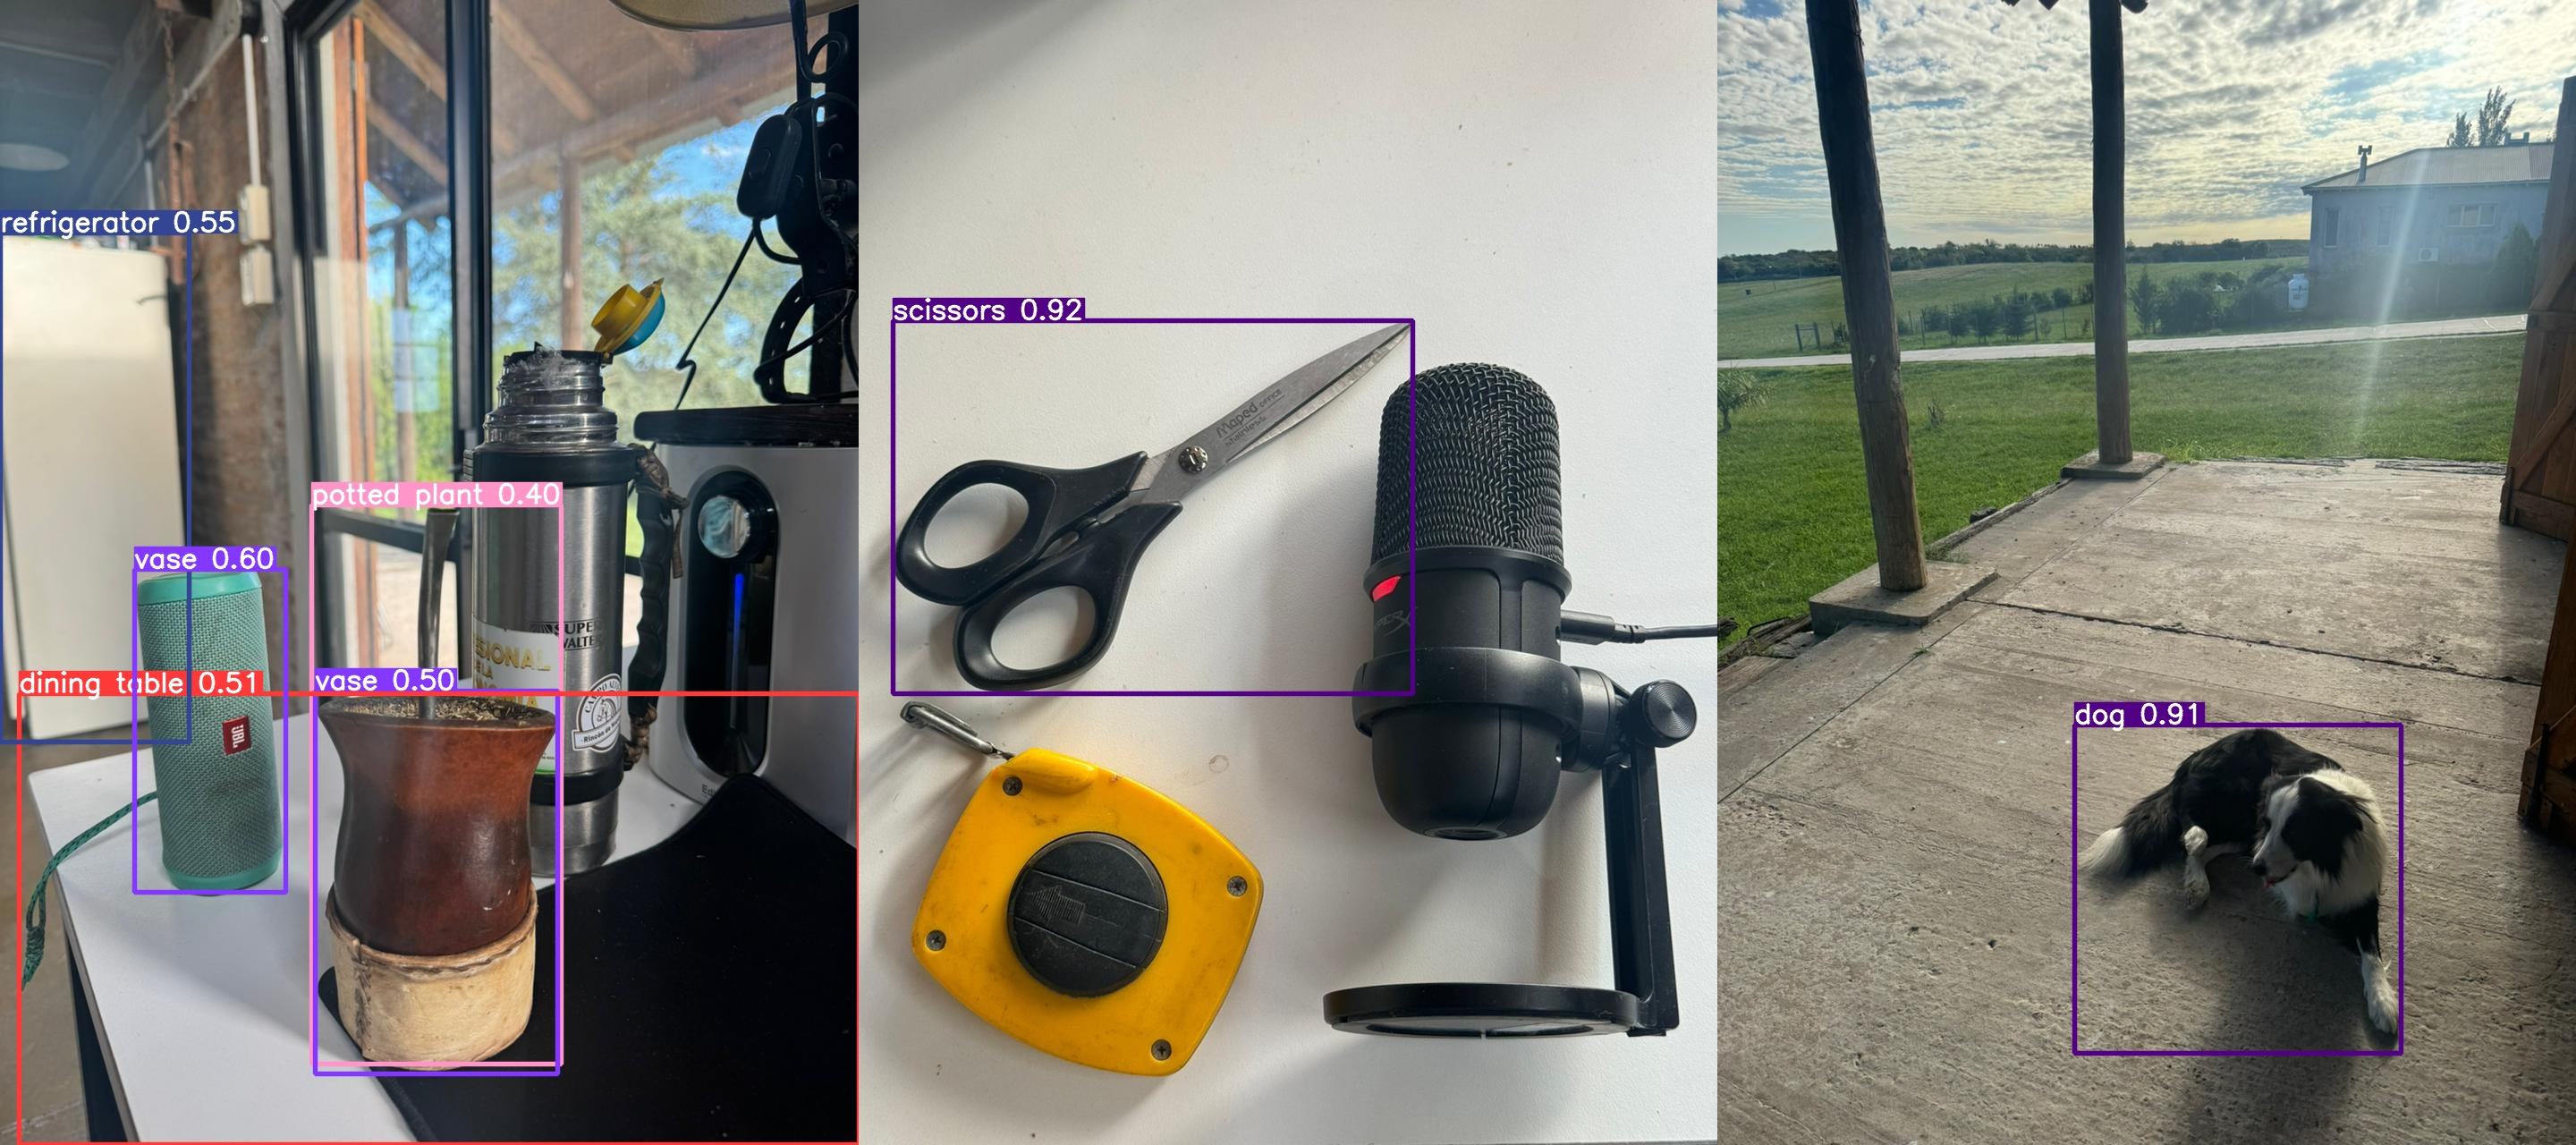

In [29]:
# Asegurarse de que todas las imágenes tengan la misma altura
height = max(annotated_img1.shape[0], annotated_img2.shape[0], annotated_img3.shape[0])
annotated_img1 = cv2.resize(annotated_img1, (int(annotated_img1.shape[1] * height / annotated_img1.shape[0]), height))
annotated_img2 = cv2.resize(annotated_img2, (int(annotated_img2.shape[1] * height / annotated_img2.shape[0]), height))
annotated_img3 = cv2.resize(annotated_img3, (int(annotated_img3.shape[1] * height / annotated_img3.shape[0]), height))

# Concatenar las imágenes horizontalmente
combined_img = cv2.hconcat([annotated_img1, annotated_img2, annotated_img3])

# Guardar la imagen combinada
cv2.imwrite('combined_image_yolo.jpg', combined_img)

Image('combined_image_yolo.jpg')